In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

df = pd.read_csv("03_AirPassengers.csv")

In [16]:
from datetime import datetime
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df.head()

C:\Users\shrey\AppData\Local\Temp\ipykernel_22236\2374905374.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)


,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [17]:
df.set_index('date', inplace=True)
df.shape

(144, 1)

In [18]:
df = df.dropna()
df.shape

(144, 1)

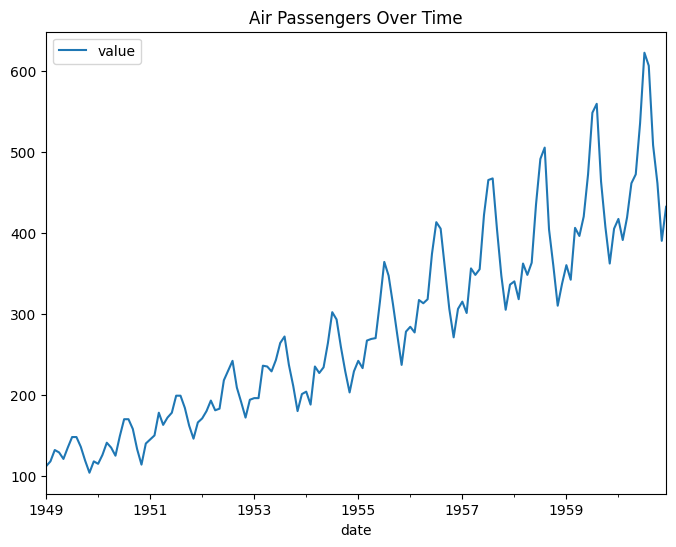

In [19]:
df.plot(figsize=(8,6), title='Air Passengers Over Time')
plt.show()

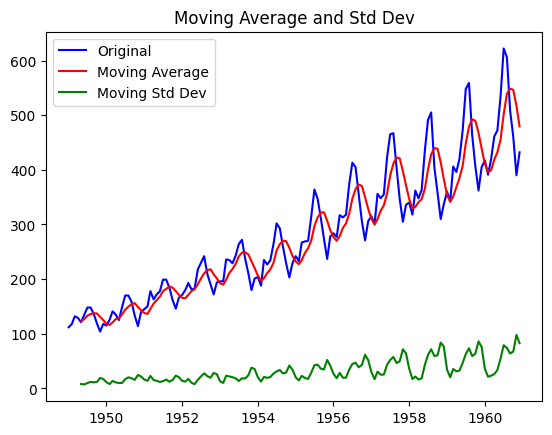

In [20]:
mva = df.rolling(window=5).mean()
mstd = df.rolling(window=5).std()
plt.plot(df, color='blue', label='Original')
plt.plot(mva, color='red', label='Moving Average')
plt.plot(mstd, color='green', label='Moving Std Dev')
plt.title('Moving Average and Std Dev')
plt.legend()
plt.show()

In [23]:
def adf_test(series):
    result = sm.tsa.stattools.adfuller(series, autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', '#Observations Used']
    for value, label in zip(result, labels):
        print(f'{label}: {value}')
    if result[1] <= 0.05:
        print("Series is stationary")
    else:
        print("Series is non-stationary")

adf_test(df['value'])

ADF Test Statistic: 0.8153688792060482
p-value: 0.991880243437641
#Lags Used: 13
#Observations Used: 130
Series is non-stationary
